In [97]:
#Importing necessaru libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [6]:
df = pd.read_csv('AirPassengers.csv')

In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [9]:
df = df.set_index(df['Month'])
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [10]:
df = df.drop(columns=['Month'])

In [11]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
dftest = adfuller(timeseries, autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used",],)
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" % key] = value
print(dfoutput)

    return dftest[1] < 0.05

adf_test(timeseries)

In [19]:
result = adfuller(df)

# Print test statistic and p-value
print("Test statistic: ", result[0])
print("p-value: ", result[1])
print("Critical values: ", result[4])
print("Autolag: ", result[5])
if result[1]<0.05:
    print("It is stationary")
else:
    print("It is not stationary")

Test statistic:  -2.8292668241700114
p-value:  0.05421329028382387
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Autolag:  988.5069317854085
It is not stationary


In [15]:
df = df-df.shift(1)

In [20]:
df = df.dropna()#Since it contain null values
result2 = adfuller(df)
print("Test statistic: ", result2[0])
print("p-value: ", result2[1])
print("Critical values: ", result2[4])
print("Autolag: ", result2[5])
if result2[1]<0.05:
    print("It is stationary")
else:
    print("It is not stationary")

Test statistic:  -2.8292668241700114
p-value:  0.05421329028382387
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Autolag:  988.5069317854085
It is not stationary


In [21]:
df = df-df.shift(2)

In [22]:
df = df.dropna()
result3 = adfuller(df)
print("Test statistic: ", result3[0])
print("p-value: ", result3[1])
print("Critical values: ", result3[4])
print("Autolag: ", result3[5])
if result3[1]<0.05:
    print("It is stationary")
else:
    print("It is not stationary")

Test statistic:  -15.834423365324907
p-value:  9.857018894069902e-29
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Autolag:  986.823797868942
It is stationary


In [40]:
df.head()

,#Passengers
Month,
1949-04-01,-9.0
1949-05-01,-22.0
1949-06-01,17.0
1949-07-01,21.0
1949-08-01,-14.0


/Users/suryatejasista/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/suryatejasista/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


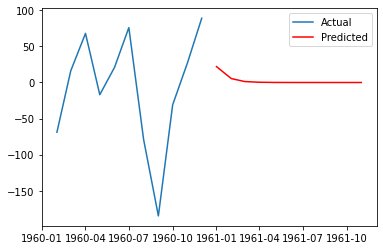

In [47]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

df.count()


model = AutoReg(df, lags=1).fit()

predictions = model.predict(start=len(df), end=len(df)+10)

plt.plot(df.tail(11), label='Actual')
plt.plot(predictions, label='Predicted', color='r')
plt.legend(loc='best')
plt.show()

In [ ]:
mse = mean_squared_error(df[-10:], predictions)
print("MSE: ", mse)


/Users/suryatejasista/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


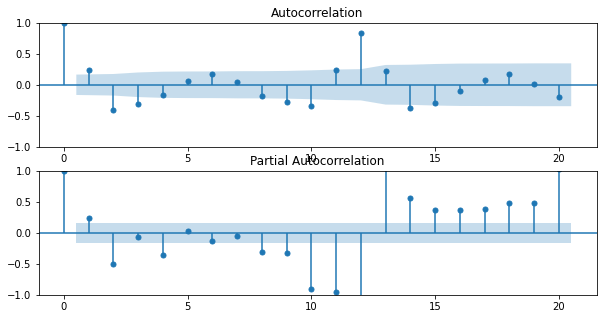

In [93]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
plot_acf(df, lags=20, ax=ax1)
plot_pacf(df, lags=20, ax=ax2)
plt.show()


In [95]:
df_train_set = df.loc[df.index < '1958-01-01']
df_test_set = df.loc[df.index >= '1958-01-01']

In [100]:
model2=ARIMA(df_train_set, order  = (3, 2, 1))
mod_tr=model2.fit()

/Users/suryatejasista/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/suryatejasista/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/suryatejasista/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
mod_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  105
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -533.997
Date:                Sun, 22 Jan 2023   AIC                           1077.995
Time:                        03:49:37   BIC                           1091.168
Sample:                    04-01-1949   HQIC                          1083.331
                         - 12-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1801      0.151     -1.190      0.234      -0.477       0.116
ar.L2         -0.5220      0.102     -5.106      0.000      -0.722      -0.322
ar.L3         -0.0353      0.158     -0.224      0.823      -0.344       0.274
ma.L1         -0.9999     36.285     -0.028      0.978     -72.116      70.116
sigma2      1753.4602   6.37e+04      0.028      0.978   -1.23e+05    1.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.52
Prob(Q):                              0.76   Prob(JB):                         0.10
Heteroskedasticity (H):               5.04   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 864x720 with 0 Axes>

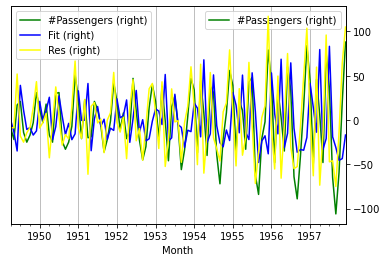

In [84]:

plt.figure(figsize=(12,10))
df_train_set.plot(color='green', grid=True, secondary_y=True, label='True_values')
mod_tr.fittedvalues.plot(color='blue', grid=True, secondary_y=True, label='Fit')
mod_tr.resid.plot(color='yellow', grid=True, secondary_y=True, label='Res')

plt.legend()
plt.show()

In [85]:
from statsmodels.tsa.arima_model import ARIMA

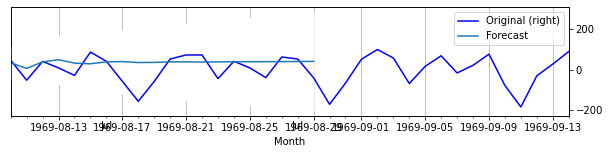

In [87]:
forecast = mod_tr.get_forecast(steps=20)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(10,2))
df_test_set['#Passengers'].plot(color='blue', grid=True, secondary_y=True, label='Original')
plt.plot(mean_forecast, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='white')
plt.legend()
plt.show()


